In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Main Experiment (600, 100 epochs)

## MAE Pretraining

In [30]:
fn = "./outputs/main_exp/mae-pretrain/metrics.csv"
metrics_mae = pd.read_csv(fn).sort_values(by='epoch')

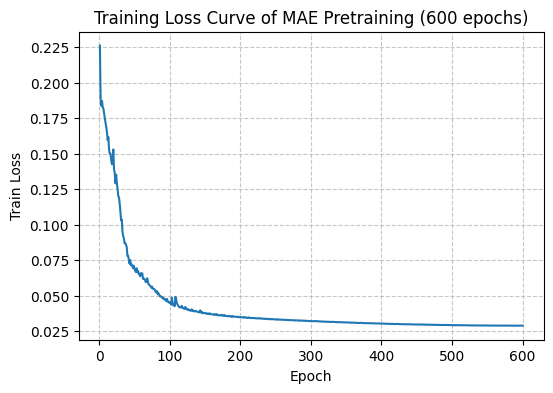

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(metrics_mae['epoch']+1, metrics_mae['train_loss'])
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve of MAE Pretraining (600 epochs)')
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('./outputs/main_exp/mae-pretrain/mae_pretrain_loss_curve_600-epochs.png', dpi=100)
plt.show()

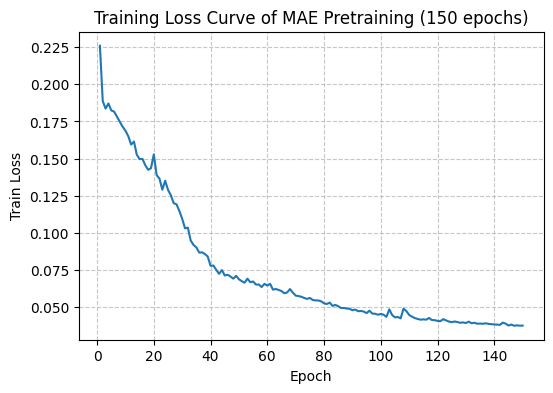

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(metrics_mae['epoch'][:150]+1, metrics_mae['train_loss'][:150])
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve of MAE Pretraining (150 epochs)')
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('./outputs/main_exp/mae-pretrain/mae_pretrain_loss_curve_150-epochs.png', dpi=100)
plt.show()

## Visualization of Training Loss and Validation Accuracy

In [31]:
fn = "./outputs/main_exp/pretrain-cls/metrics.csv"
metrics_ft = pd.read_csv(fn).sort_values(by='epoch')
metrics_ft.shape

(100, 10)

In [33]:
metrics_ft["val_acc"][:50].max()

np.float64(0.8562104430379747)

In [34]:
fn = "./outputs/main_exp/scratch-cls/metrics.csv"
metrics_cls = pd.read_csv(fn).sort_values(by='epoch')
metrics_cls.shape

(100, 10)

In [35]:
metrics_cls["val_acc"][:50].max()

np.float64(0.7362539556962026)

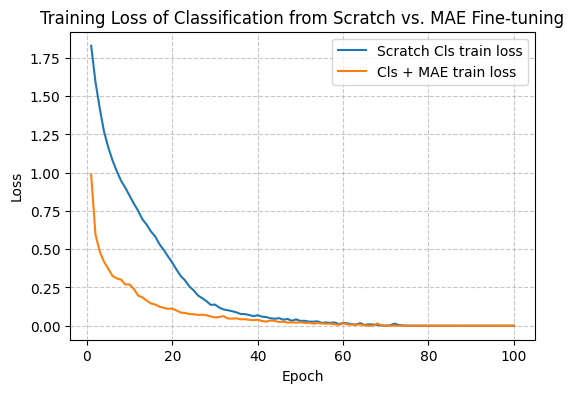

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(metrics_cls['epoch']+1, metrics_cls['train_loss'], label='Scratch Cls train loss')
plt.plot(metrics_ft['epoch']+1, metrics_ft['train_loss'], label='Cls + MAE train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss of Classification from Scratch vs. MAE Fine-tuning')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('./outputs/main_exp/scratch_vs_finetune_loss_curve_100-epochs.png', dpi=100)
plt.show()

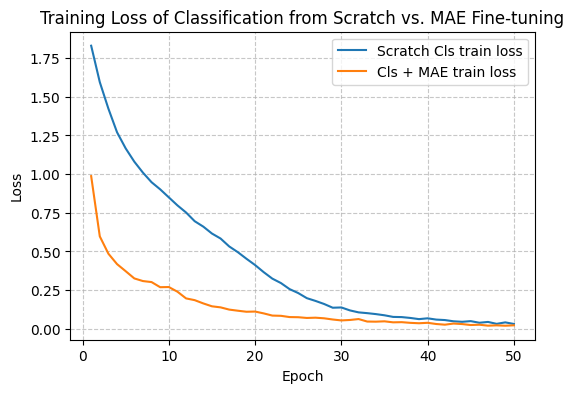

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(metrics_cls['epoch'][:50]+1, metrics_cls['train_loss'][:50], label='Scratch Cls train loss')
plt.plot(metrics_ft['epoch'][:50]+1, metrics_ft['train_loss'][:50], label='Cls + MAE train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss of Classification from Scratch vs. MAE Fine-tuning')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('./outputs/main_exp/scratch_vs_finetune_loss_curve_50-epochs.png', dpi=100)
plt.show()

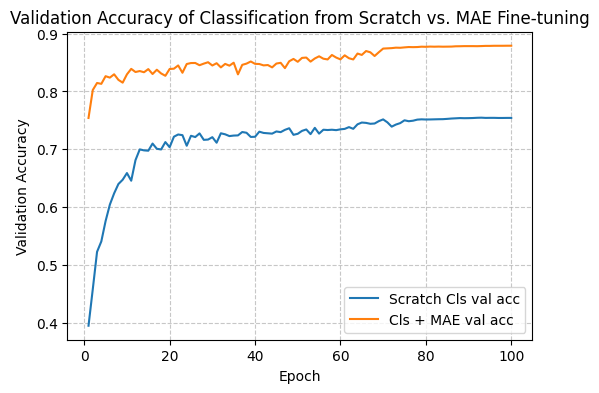

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(metrics_cls['epoch']+1, metrics_cls['val_acc'], label='Scratch Cls val acc')
plt.plot(metrics_ft['epoch']+1, metrics_ft['val_acc'], label='Cls + MAE val acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of Classification from Scratch vs. MAE Fine-tuning')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('./outputs/main_exp/scratch_vs_finetune_val_acc_curve_100-epochs.png', dpi=100)
plt.show()

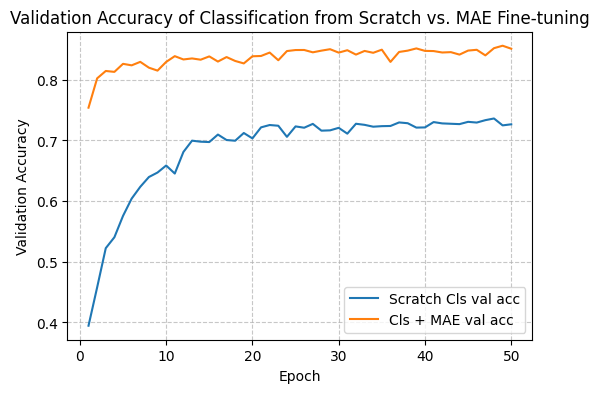

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(metrics_cls['epoch'][:50]+1, metrics_cls['val_acc'][:50], label='Scratch Cls val acc')
plt.plot(metrics_ft['epoch'][:50]+1, metrics_ft['val_acc'][:50], label='Cls + MAE val acc')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of Classification from Scratch vs. MAE Fine-tuning')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('./outputs/main_exp/scratch_vs_finetune_val_acc_curve_50-epochs.png', dpi=100)
plt.show()

# Main Experiment (150, 50 epochs)

## MAE Pretraining

In [23]:
ROOT = "main_exp_150_50"
fn = f"./outputs/{ROOT}/mae-pretrain/metrics.csv"
metrics_mae = pd.read_csv(fn).sort_values(by='epoch')

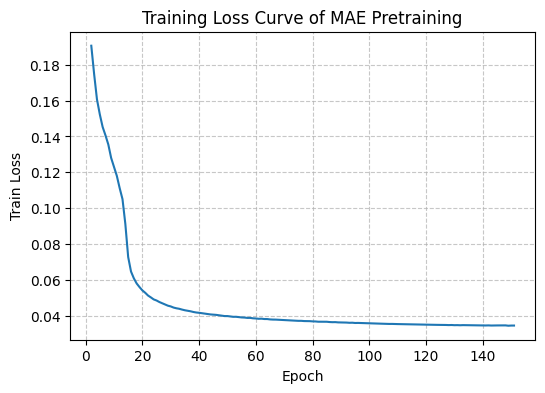

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(metrics_mae['epoch']+1, metrics_mae['train_loss'])
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve of MAE Pretraining')
plt.grid(linestyle='--', alpha=0.7)
plt.savefig(f'./outputs/{ROOT}/mae-pretrain/mae_pretrain_loss_curve.png', dpi=100)
plt.show()

## Visualization of Training Loss and Validation Accuracy

In [28]:
ROOT

'main_exp_150_50'

In [25]:
fn = f"./outputs/{ROOT}/pretrain-cls/metrics.csv"
metrics_ft = pd.read_csv(fn).sort_values(by='epoch')
metrics_ft.shape

(62, 10)

In [26]:
metrics_ft["val_acc"][:50].max()

np.float64(0.8251582278481012)

In [27]:
fn = f"./outputs/{ROOT}/scratch-cls/metrics.csv"
metrics_cls = pd.read_csv(fn).sort_values(by='epoch')
metrics_cls.shape

(50, 10)

In [29]:
metrics_cls["val_acc"][:50].max()

np.float64(0.7520767405063291)

# Ablation Study

## Decoder Depth

In [2]:
ROOT = "ablation/depth/"

In [3]:
metrics = {}
for depth in [1, 2, 4, 8]:

    if depth == 4:
        exp = f"ablation/depth/{depth}" #"main_exp_150_50"
    else:
        exp = f"ablation/depth/{depth}"

    fn = f"./outputs/{exp}/mae-pretrain/metrics.csv"
    metrics_mae = pd.read_csv(fn).sort_values(by='epoch')
    metrics[f"mae_depth_{depth}"] = metrics_mae

    fn = f"./outputs/{exp}/pretrain-cls/metrics.csv"
    metrics_ft = pd.read_csv(fn).sort_values(by='epoch')
    metrics[f"ft_depth_{depth}"] = metrics_ft

    fn = f"./outputs/{exp}/pretrain-cls-lin/metrics.csv"
    metrics_cls = pd.read_csv(fn).sort_values(by='epoch')
    metrics[f"lin_depth_{depth}"] = metrics_cls

In [37]:
for depth in [1, 2, 4, 8]:
    print(f"MAE depth {depth}:")
    print(f"  Finetune val acc: {metrics[f'ft_depth_{depth}']['val_acc'][:50].max():.4f}")
    print(f"  Linear probe val acc: {metrics[f'lin_depth_{depth}']['val_acc'][:50].max():.4f}")

MAE depth 1:
  Finetune val acc: 0.8479
  Linear probe val acc: 0.5602
MAE depth 2:
  Finetune val acc: 0.8419
  Linear probe val acc: 0.5711
MAE depth 4:
  Finetune val acc: 0.8252
  Linear probe val acc: 0.5621
MAE depth 8:
  Finetune val acc: 0.8455
  Linear probe val acc: 0.5621


In [5]:
for depth in [1, 2, 4, 8]:
    print(f"MAE depth {depth}:")
    print(f"  Finetune val acc: {metrics[f'ft_depth_{depth}']['val_acc'][:50].max():.4f}")
    print(f"  Linear probe val acc: {metrics[f'lin_depth_{depth}']['val_acc'][:50].max():.4f}")

MAE depth 1:
  Finetune val acc: 0.8479
  Linear probe val acc: 0.5602
MAE depth 2:
  Finetune val acc: 0.8419
  Linear probe val acc: 0.5711
MAE depth 4:
  Finetune val acc: 0.7837
  Linear probe val acc: 0.5274
MAE depth 8:
  Finetune val acc: 0.8455
  Linear probe val acc: 0.5621


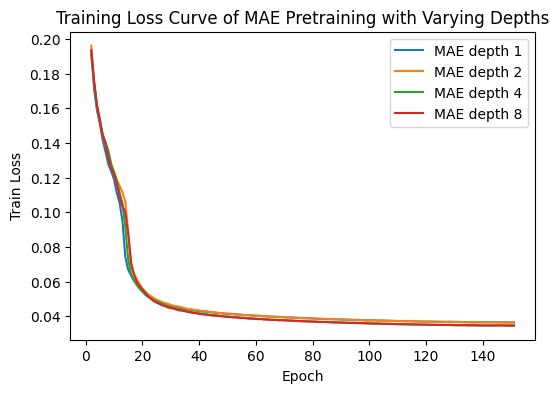

In [8]:
plt.figure(figsize=(6, 4))
for depth in [1, 2, 4, 8]:
    plt.plot(metrics[f"mae_depth_{depth}"]['epoch']+1, metrics[f"mae_depth_{depth}"]['train_loss'], label=f'MAE depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve of MAE Pretraining with Varying Depths')
plt.legend()

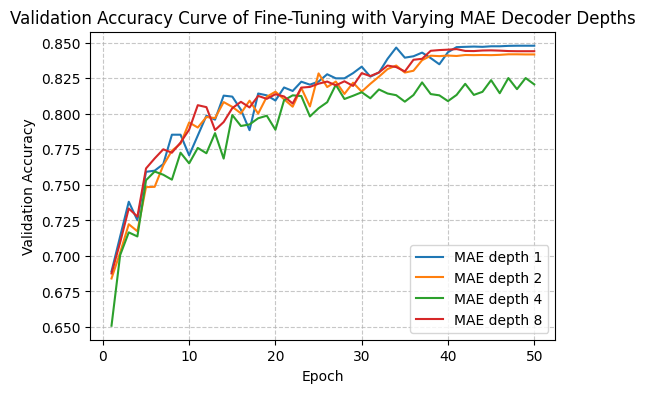

In [19]:
plt.figure(figsize=(6, 4))
for depth in [1, 2, 4, 8]:
    k = f"ft_depth_{depth}"
    plt.plot(metrics[k]['epoch'][:50]+1, metrics[k]['val_acc'][:50], label=f'MAE depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve of Fine-Tuning with Varying MAE Decoder Depths')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
for depth in [1, 2, 4, 8]:
    k = f"ft_depth_{depth}"
    plt.plot(metrics[k]['epoch']+1, metrics[k]['val_acc'], label=f'MAE depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve of Fine-Tuning with Varying MAE Decoder Depths')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()

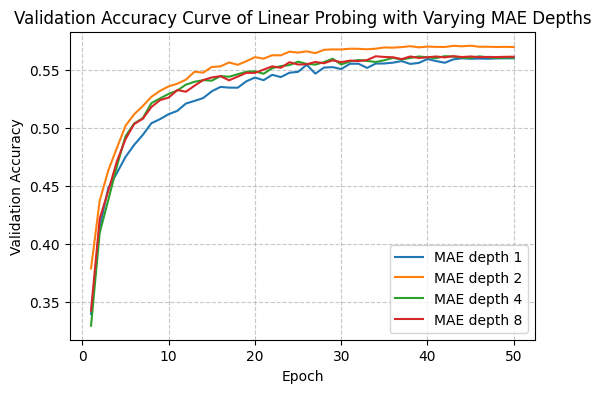

In [ ]:
plt.figure(figsize=(6, 4))
for depth in [1, 2, 4, 8]:
    k = f"lin_depth_{depth}"
    plt.plot(metrics[k]['epoch']+1, metrics[k]['val_acc'], label=f'MAE depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve of Linear Probing with Varying MAE Decoder Depths')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()

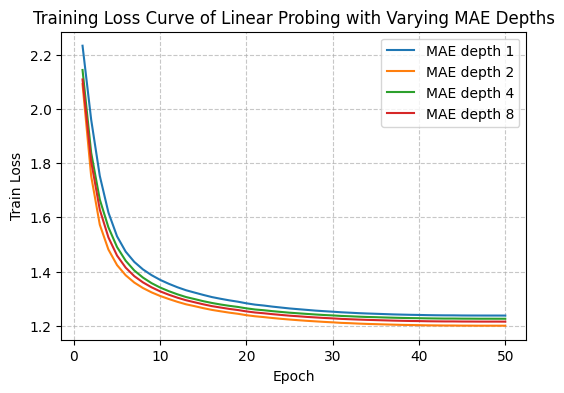

In [ ]:
plt.figure(figsize=(6, 4))
for depth in [1, 2, 4, 8]:
    k = f"lin_depth_{depth}"
    plt.plot(metrics[k]['epoch']+1, metrics[k]['train_loss'], label=f'MAE depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve of Linear Probing with Varying MAE Decoder Depths')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

## Decoder Width

In [38]:
ROOT = "ablation/width/"

In [39]:
# metrics = {}

for width in [64, 128, 192, 256, 512]:
    if width == 192:
        exp = "main_exp_150_50"
    else:
        exp = f"ablation/width/{width}"

    fn = f"./outputs/{exp}/mae-pretrain/metrics.csv"
    metrics_mae = pd.read_csv(fn).sort_values(by='epoch')
    metrics[f"mae_width_{width}"] = metrics_mae

    fn = f"./outputs/{exp}/pretrain-cls/metrics.csv"
    metrics_ft = pd.read_csv(fn).sort_values(by='epoch')
    metrics[f"ft_width_{width}"] = metrics_ft

    fn = f"./outputs/{exp}/pretrain-cls-lin/metrics.csv"
    metrics_cls = pd.read_csv(fn).sort_values(by='epoch')
    metrics[f"lin_width_{width}"] = metrics_cls

In [40]:
for width in [64, 128, 192, 256, 512]:
    print(f"MAE width {width}:")
    print(f"  Finetune val acc: {metrics[f'ft_width_{width}']['val_acc'][:50].max():.4f}")
    print(f"  Linear probe val acc: {metrics[f'lin_width_{width}']['val_acc'][:50].max():.4f}")

MAE width 64:
  Finetune val acc: 0.8445
  Linear probe val acc: 0.5390
MAE width 128:
  Finetune val acc: 0.8288
  Linear probe val acc: 0.5584
MAE width 192:
  Finetune val acc: 0.8252
  Linear probe val acc: 0.5621
MAE width 256:
  Finetune val acc: 0.8449
  Linear probe val acc: 0.5423
MAE width 512:
  Finetune val acc: 0.8271
  Linear probe val acc: 0.5588


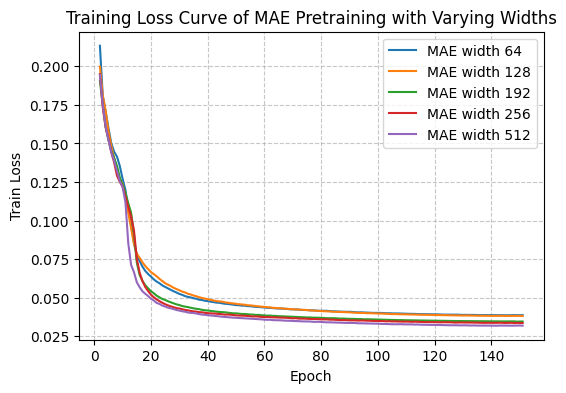

In [41]:
plt.figure(figsize=(6, 4))
for width in [64, 128, 192, 256, 512]:
    plt.plot(metrics[f"mae_width_{width}"]['epoch']+1, metrics[f"mae_width_{width}"]['train_loss'], label=f'MAE width {width}')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve of MAE Pretraining with Varying Widths')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

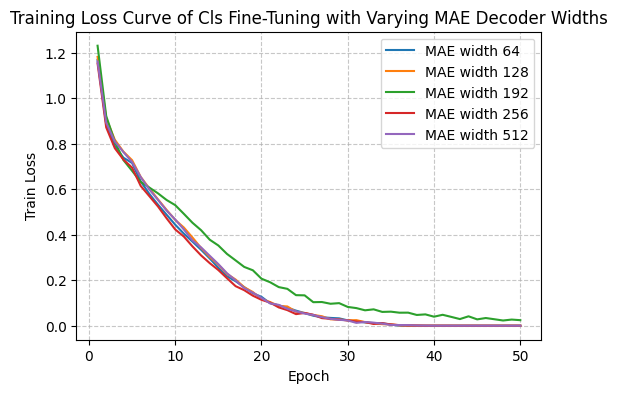

In [43]:
plt.figure(figsize=(6, 4))
for width in [64, 128, 192, 256, 512]:
    plt.plot(
        metrics[f"ft_width_{width}"]['epoch'][:50]+1,
        metrics[f"ft_width_{width}"]['train_loss'][:50],
        label=f'MAE width {width}'
    )
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve of Cls Fine-Tuning with Varying MAE Decoder Widths')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

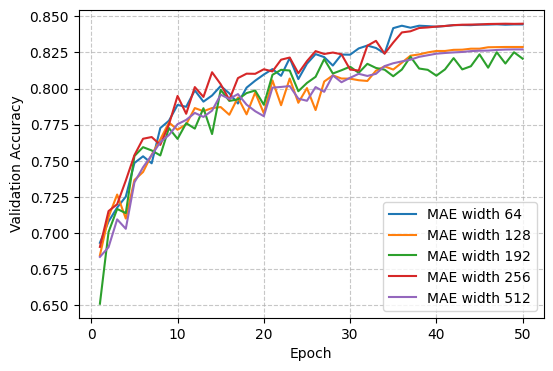

In [47]:
plt.figure(figsize=(6, 4))
for width in [64, 128, 192, 256, 512]:
    plt.plot(
        metrics[f"ft_width_{width}"]['epoch'][:50]+1,
        metrics[f"ft_width_{width}"]['val_acc'][:50],
        label=f'MAE width {width}'
    )
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

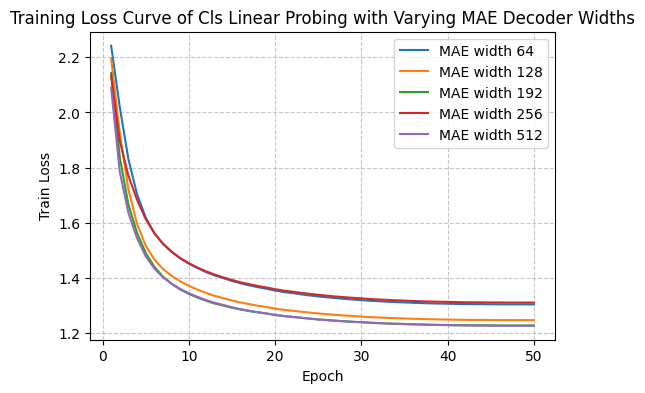

In [44]:
plt.figure(figsize=(6, 4))
for width in [64, 128, 192, 256, 512]:
    plt.plot(
        metrics[f"lin_width_{width}"]['epoch'][:50]+1,
        metrics[f"lin_width_{width}"]['train_loss'][:50],
        label=f'MAE width {width}'
    )
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss Curve of Cls Linear Probing with Varying MAE Decoder Widths')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

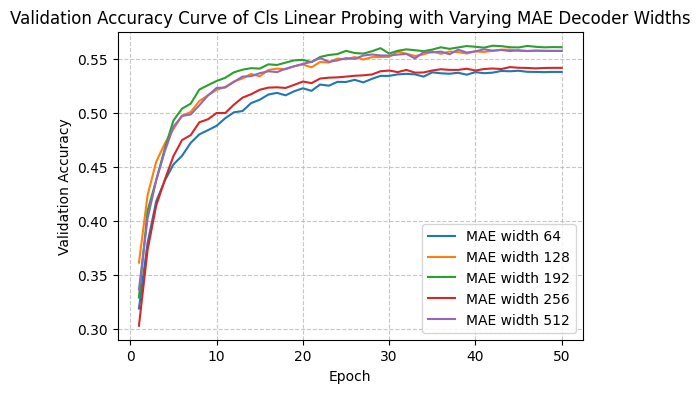

In [45]:
plt.figure(figsize=(6, 4))
for width in [64, 128, 192, 256, 512]:
    plt.plot(
        metrics[f"lin_width_{width}"]['epoch'][:50]+1,
        metrics[f"lin_width_{width}"]['val_acc'][:50],
        label=f'MAE width {width}'
    )
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Curve of Cls Linear Probing with Varying MAE Decoder Widths')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

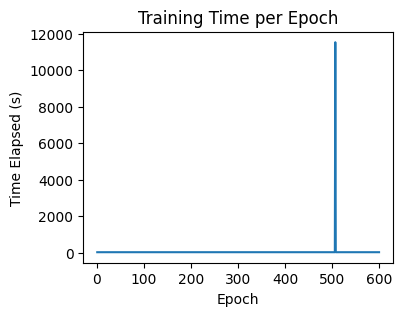

In [13]:
x = metrics_mae["epoch"] + 1
y = metrics_mae["time_elapsed"]
plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Time Elapsed (s)")
plt.title("Training Time per Epoch")
plt.show()